# **0. Introduction**

This notebook uses IBM HR Analytics Employee Attrition dataset found from Kaggle: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

I borrowed code from the following Kaggle notebooks:

https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

https://www.kaggle.com/ash316/eda-to-prediction-dietanic

The Goal of the notebook is to apply classification techniques to predict whether employees stay or left the company

# **1. Import libraries**

In [1]:
import sys
import pandas as pd
pd.set_option('display.max_columns', 40)
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy as sp
import IPython
from IPython import display
import random
import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
#plot size adjustment
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('darkgrid')
pylab.rcParams['figure.figsize'] = 9,5

In [142]:
#importing relevant ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import GridSearchCV


In [143]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg

In [144]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

# **2. Import dataset**

In [4]:
import glob

# Importing drive method from colab for accessing google drive
from google.colab import drive

In [5]:
# Mounting drive
# This will require authentication : Follow the steps as guided
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/DS - data science prep/Projects/ibm_kaggle/ibm.csv')

# **3. Cleaning data**

## Data Overview

In [7]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.isnull().sum() #checking for total null values

## Checking variables one by one

In [ ]:
#attrition is the outcome variable
df['Attrition'].value_counts()

#Among the 1470 employees, 237 left, 1233 stayed.

In [11]:
#Create a new column called "Att" by converting 'yes', 'no' from 'Attrition' to 1, 0.
df['Att'] = df['Attrition'].map({'Yes':1, 'No':0})
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]

df['Att'].value_counts()

0    1233
1     237
Name: Att, dtype: int64

Age (continuous)

In [ ]:
df['Age'].describe()

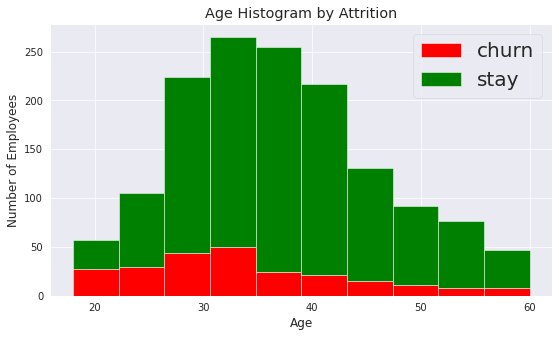

In [12]:
plt.hist(x=[df[df['Att']==1]['Age'], df[df['Att']==0]['Age']], stacked=True, color = ['r', 'g'], label = ['churn', 'stay'])
plt.title('Age Histogram by Attrition')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.legend(loc=1, prop={'size': 20})


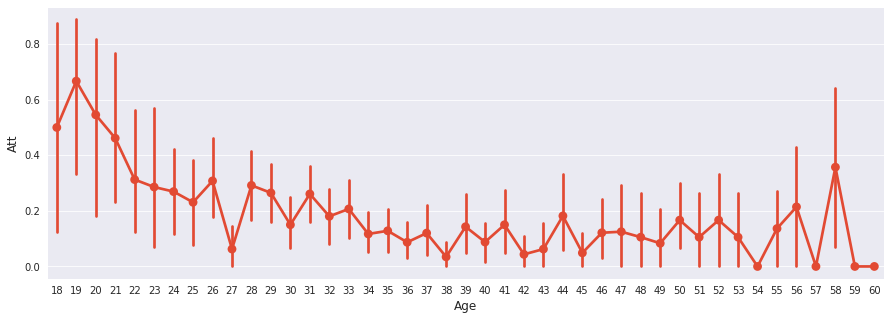

In [53]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(x='Age', y='Att', data=df)

Take away from graphs on Age:
1. Age range from 18 to 60. 
2. As age increases, attrition rate first declines, then increases around 55-60 (close to retirement age)

BusinessTravel (categorical)

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


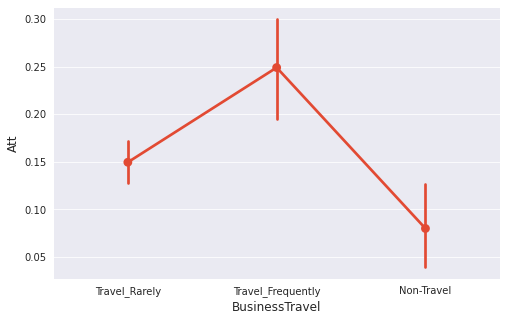

In [52]:
print(df['BusinessTravel'].value_counts())

fig, ax = plt.subplots(figsize=(8,5))
sns.pointplot(x='BusinessTravel', y='Att', data=df)

#employees with frequent travel have the highest likelihood to leave

Take away from graphs on Business Travel:
1. More travel means greater attrition rate.
2. Need to convert the categorical variable into three dummy variables

DailyRate (continuous)

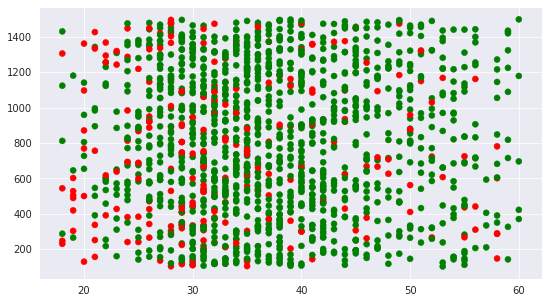

In [17]:
#dailyrate interact with age
colors = {1:'red', 0:'green'}
plt.scatter(df['Age'], df['DailyRate'], c=df['Att'].apply(lambda x: colors[x]))
plt.show()

#surprisingly, dailyrate does not have strong correlation with age.

Departments (categorical)

DistanceFromHome (continuous)

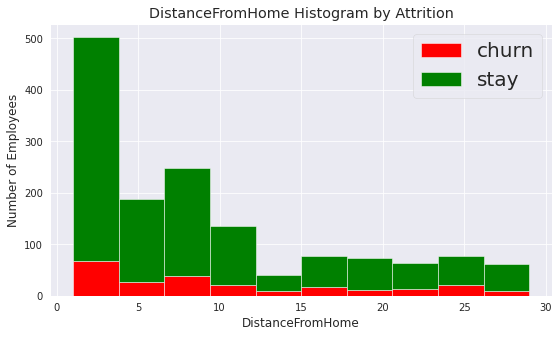

In [18]:
plt.hist(x=[df[df['Att']==1]['DistanceFromHome'], df[df['Att']==0]['DistanceFromHome']], stacked=True, color = ['r', 'g'], label = ['churn', 'stay'])
plt.title('DistanceFromHome Histogram by Attrition')
plt.xlabel('DistanceFromHome')
plt.ylabel('Number of Employees')
plt.legend(loc=1, prop={'size': 20})

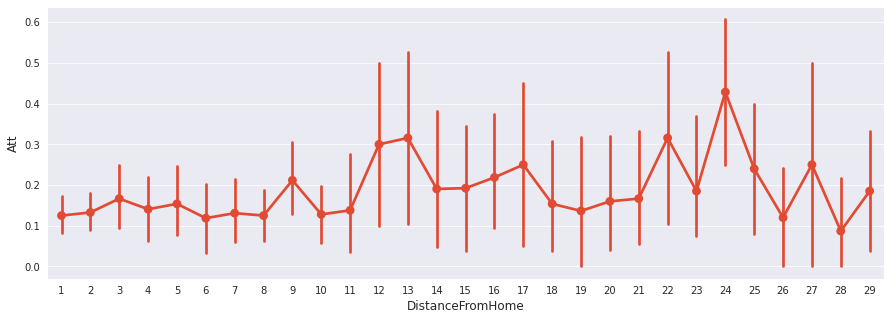

In [51]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(x='DistanceFromHome', y='Att', data=df)

Take away from distancefromhome:
1. as distance increases, attrituion rate also increases.

Education (categorical)

In [21]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

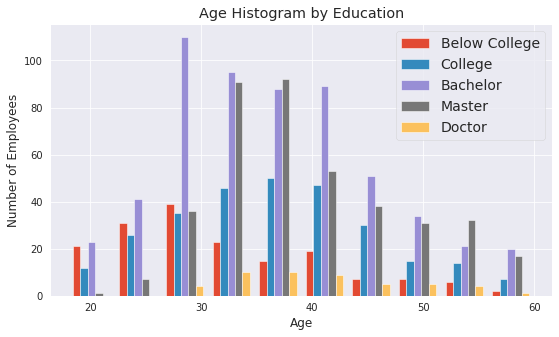

In [20]:
plt.hist(x=[df[df['Education']==1]['Age'], df[df['Education']==2]['Age'], df[df['Education']==3]['Age'], 
            df[df['Education']==4]['Age'], df[df['Education']==5]['Age']], label = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.title('Age Histogram by Education')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.legend(loc=1, prop={'size': 14})

In [ ]:
df['EducationField'].value_counts()

In [23]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [24]:
df['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

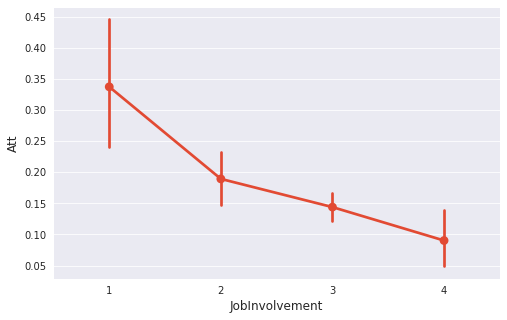

In [50]:
fig, ax = plt.subplots(figsize=(8,5))
sns.pointplot(x='JobInvolvement', y='Att', data=df)

Takeaway: high job involvement level is associated with low attrition rate.

In [26]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

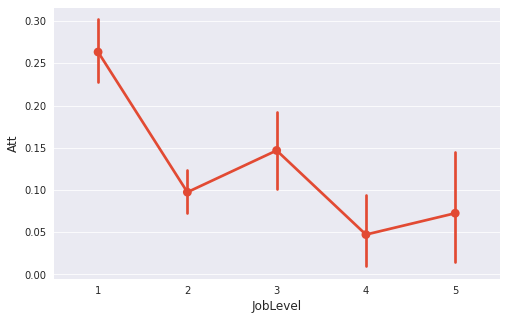

In [49]:
fig, ax = plt.subplots(figsize=(8,5))
sns.pointplot(x='JobLevel', y='Att', data=df)

In [28]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

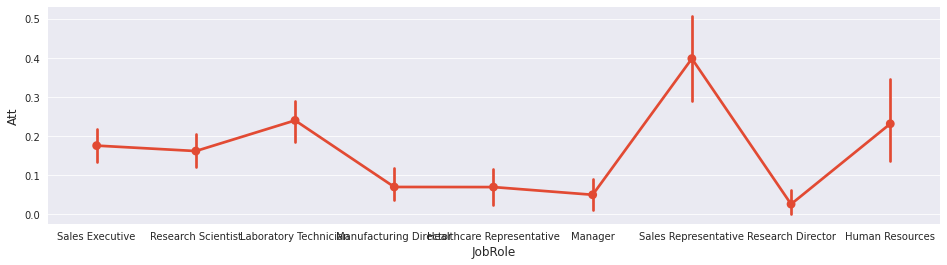

In [48]:
fig, ax = plt.subplots(figsize=(16,4))
sns.pointplot(x='JobRole', y='Att', data=df)

Take away: Sales representative and HR have particularly high attrition rate.

In [30]:
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

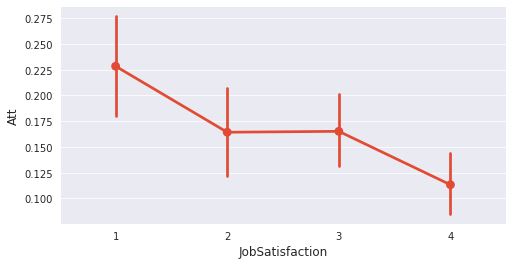

In [46]:
fig, ax = plt.subplots(figsize=(8,4))
sns.pointplot(x='JobSatisfaction', y='Att', data=df)

Take Away: low job satisfaction is associated with high attrition rate.

In [32]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

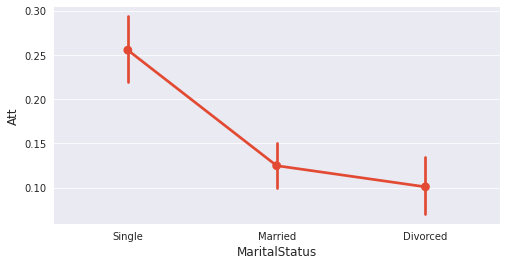

In [45]:
fig, ax = plt.subplots(figsize=(8,4))
sns.pointplot(x='MaritalStatus', y='Att', data=df)

Take away: single people are associated with high attrition rate, probably because single people are younger.

In [34]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

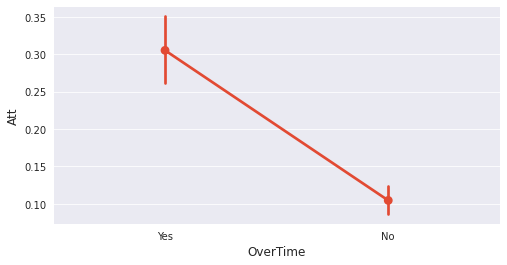

In [44]:
fig, ax = plt.subplots(figsize=(8,4))
sns.pointplot(x='OverTime', y='Att', data=df)

Takeaway: overtime employee have higher attrition rate.

In [36]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

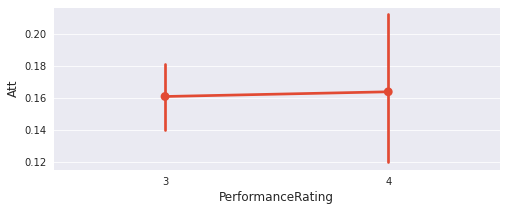

In [43]:
fig, ax = plt.subplots(figsize=(8,3))
sns.pointplot(x='PerformanceRating', y='Att', data=df)

Takeaway: Performance rating does not make a big difference.

In [54]:
df['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

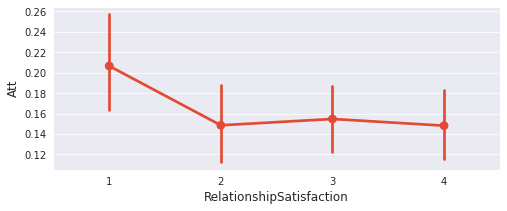

In [55]:
fig, ax = plt.subplots(figsize=(8,3))
sns.pointplot(x='RelationshipSatisfaction', y='Att', data=df)

In [56]:
df['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

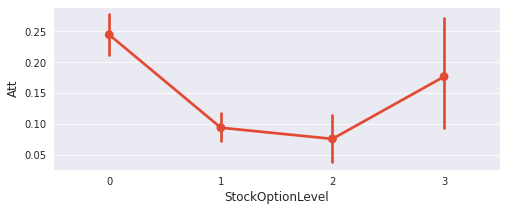

In [57]:
fig, ax = plt.subplots(figsize=(8,3))
sns.pointplot(x='StockOptionLevel', y='Att', data=df)

# **4. Feature Engineering**

In [60]:
#dummify the variable into three categories
cat = [#new
        'EnvironmentSatisfaction',
        'JobInvolvement',
        'JobSatisfaction',
        'RelationshipSatisfaction',
        'WorkLifeBalance',
       #old
        'BusinessTravel',
        'Department', 
        'Education',
        'EducationField',
        'Gender',
        'JobRole',
        'MaritalStatus',
        'OverTime',
        'PerformanceRating',
        'StockOptionLevel',
        'JobLevel']
df_new = pd.get_dummies(df[cat].astype(str))

In [61]:
df2 = pd.concat([df, df_new], axis=1)

In [62]:
drop_columns = [#new
        'EnvironmentSatisfaction',
        'JobInvolvement',
        'JobSatisfaction',
        'RelationshipSatisfaction',
        'WorkLifeBalance',
                #old
                'Attrition',
                'BusinessTravel',
                'Department',
                'Education',
                'EducationField',
                'Gender',
                'JobRole',
                'MaritalStatus',
                'OverTime',
                'PerformanceRating',
                'StockOptionLevel',
                'JobLevel',
                'EmployeeCount',
                'EmployeeNumber',
                'Over18',
                'StandardHours']
dfc = df2.drop(drop_columns, axis=1, inplace=False)

In [63]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 79 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Att                                1470 non-null   int64
 1   Age                                1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   HourlyRate                         1470 non-null   int64
 5   MonthlyIncome                      1470 non-null   int64
 6   MonthlyRate                        1470 non-null   int64
 7   NumCompaniesWorked                 1470 non-null   int64
 8   PercentSalaryHike                  1470 non-null   int64
 9   TotalWorkingYears                  1470 non-null   int64
 10  TrainingTimesLastYear              1470 non-null   int64
 11  YearsAtCompany                     1470 non-null   int64
 12  YearsInCurrentRole  

In [ ]:
list(dfc.columns)

['Att',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'EnvironmentSatisfaction_1',
 'EnvironmentSatisfaction_2',
 'EnvironmentSatisfaction_3',
 'EnvironmentSatisfaction_4',
 'JobInvolvement_1',
 'JobInvolvement_2',
 'JobInvolvement_3',
 'JobInvolvement_4',
 'JobSatisfaction_1',
 'JobSatisfaction_2',
 'JobSatisfaction_3',
 'JobSatisfaction_4',
 'RelationshipSatisfaction_1',
 'RelationshipSatisfaction_2',
 'RelationshipSatisfaction_3',
 'RelationshipSatisfaction_4',
 'WorkLifeBalance_1',
 'WorkLifeBalance_2',
 'WorkLifeBalance_3',
 'WorkLifeBalance_4',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'Education_1',
 '

# **5. Modelling**

In [65]:
train, test =train_test_split(dfc, test_size = 0.3, random_state=0, stratify = dfc['Att'])

In [66]:
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

In [68]:
X = dfc[dfc.columns[1:]]
Y = dfc['Att']

### Radial Support Vector Machines (rbf-SVM)

In [69]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.8390022675736961


### Linear Support Vector Machine(linear-SVM)

In [ ]:
model=svm.LinearSVC(C=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8390022675736961


### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8412698412698413


### Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.7868480725623582


### K-Nearest Neighbours (KNN)

In [ ]:
model=KNeighborsClassifier(n_neighbors=9) 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8412698412698413


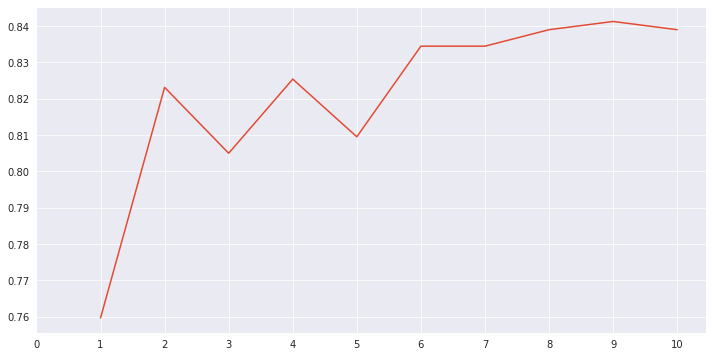

Accuracies for different values of n are: [0.75963719 0.82312925 0.80498866 0.82539683 0.80952381 0.83446712
 0.83446712 0.83900227 0.84126984 0.83900227] with the max value as  0.8412698412698413


In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Gaussian Naive Bayes

In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.7664399092970522


### Random Forests

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8639455782312925


# **6. Cross Validation**

In [137]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest', 'XGBoost']
models=[svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100), xg.XGBClassifier(n_estimators=300,learning_rate=0.05)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Radial Svm,0.838776,0.023179
Logistic Regression,0.840136,0.022613
KNN,0.838095,0.025234
Decision Tree,0.784354,0.020645
Naive Bayes,0.755782,0.025170
Random Forest,0.862585,0.021896
XGBoost,0.875510,0.031181


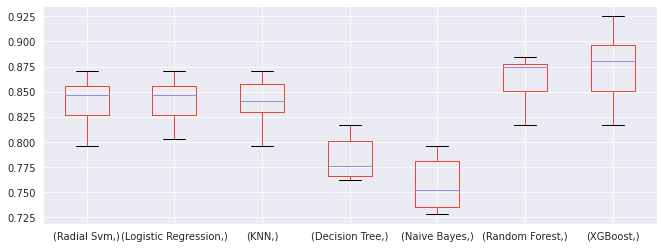

In [138]:
plt.subplots(figsize=(11,4))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

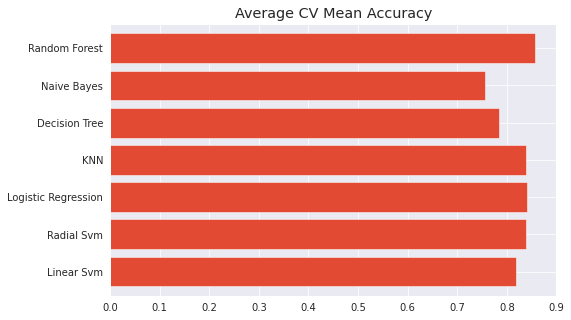

In [110]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

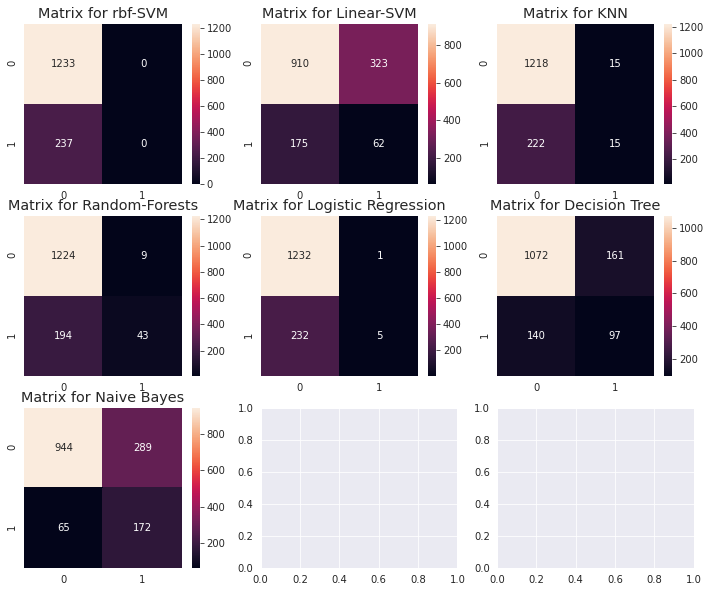

In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.LinearSVC(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

# **Parameters Tuning**

### Rbf-SVM

In [ ]:

C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  2.4min finished


0.8387755102040817
SVC(C=0.05, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
# Fitting 5 folds for each of 120 candidates, totalling 600 fits
# [Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
# [Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  2.4min finished
# 0.8387755102040817
# SVC(C=0.05, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
#     max_iter=-1, probability=False, random_state=None, shrinking=True,
#     tol=0.001, verbose=False)

### Linear SVM

In [ ]:
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'C':C}
gd=GridSearchCV(estimator=svm.LinearSVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   10.2s finished


0.8394557823129253
LinearSVC(C=0.7, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


In [ ]:
# Fitting 5 folds for each of 12 candidates, totalling 60 fits
# [Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
# [Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   10.2s finished
# 0.8394557823129253
# LinearSVC(C=0.7, class_weight=None, dual=True, fit_intercept=True,
#           intercept_scaling=1, loss='squared_hinge', max_iter=1000,
#           multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
#           verbose=0)

### Random Forest

In [ ]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   59.0s finished


0.8612244897959183
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [ ]:
# Fitting 5 folds for each of 9 candidates, totalling 45 fits
# [Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
# [Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   59.0s finished
# 0.8612244897959183
# RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=None, max_features='auto',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, n_estimators=500,
#                        n_jobs=None, oob_score=False, random_state=0, verbose=0,
#                        warm_start=False)

### LogisticRegression

In [ ]:
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'C':C}
gd=GridSearchCV(estimator=LogisticRegression(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8435374149659864
LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.1s finished


# **7. Ensembling method**

## Voting Classifier

In [ ]:
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=9)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.05,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.2)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB())
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8480725623582767
The cross validated score is 0.85578231292517


## Bagging

### Bagged KNN

In [ ]:
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.8095238095238095
The cross validated score for bagged KNN is: 0.8122448979591838


### Bagged Decision Tree

In [ ]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8480725623582767
The cross validated score for bagged Decision Tree is: 0.8598639455782313


## Boosting

### Adaptive Boosting

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8673469387755102


### Stochastic Gradient Boosting

In [ ]:
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8673469387755102


### XGBoost

In [ ]:
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8680272108843538


### Parameter Tuning

Gradient Boosting

In [146]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':[200],'learning_rate':[0.05]}
gd=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.4min finished


0.8761904761904761
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


XGBoost

In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':[300],'learning_rate':learn_rate}
gd=GridSearchCV(estimator=xg.XGBClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   42.6s finished


0.8761904761904763
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


### 8. Confusion Matrix for the Best Model

The Best Model is XGBoost, with best score at 0.8762, using n_estimators=300,learning_rate=0.05.

In [ ]:
xgboost=xg.XGBClassifier(n_estimators=300,learning_rate=0.05)
result=cross_val_predict(xgboost,X,Y,cv=10)


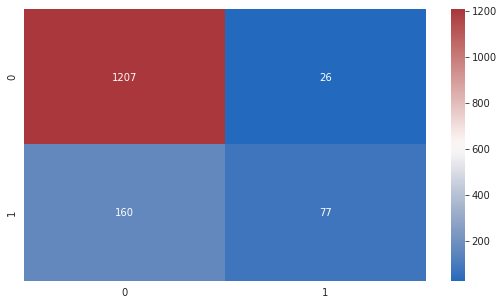

In [ ]:
sns.heatmap(confusion_matrix(Y,result),cmap='vlag',annot=True,fmt='2.0f')
plt.show()

#Final Model comparison

In [168]:

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Radial SVM','Logistic Regression','KNN','Decision Tree','Naive Bayes',
             'Random Forest', 'XGBoost']
models=[svm.SVC(kernel='rbf', C=0.05, gamma=0.1),LogisticRegression(C=0.2),
        KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(),GaussianNB(),
        RandomForestClassifier(n_estimators=500), 
        xg.XGBClassifier(n_estimators=300,learning_rate=0.05)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Radial SVM,0.838776,0.023179
Logistic Regression,0.841497,0.024157
KNN,0.838095,0.025234
Decision Tree,0.777551,0.025463
Naive Bayes,0.755782,0.025170
Random Forest,0.861224,0.019048
XGBoost,0.875510,0.031181


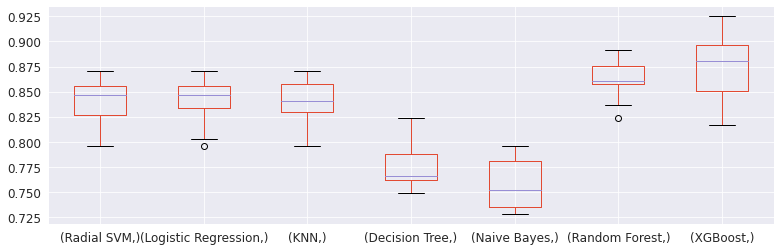

In [170]:
plt.subplots(figsize=(13,4))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot(fontsize=12)

# **9. Feature Importance**

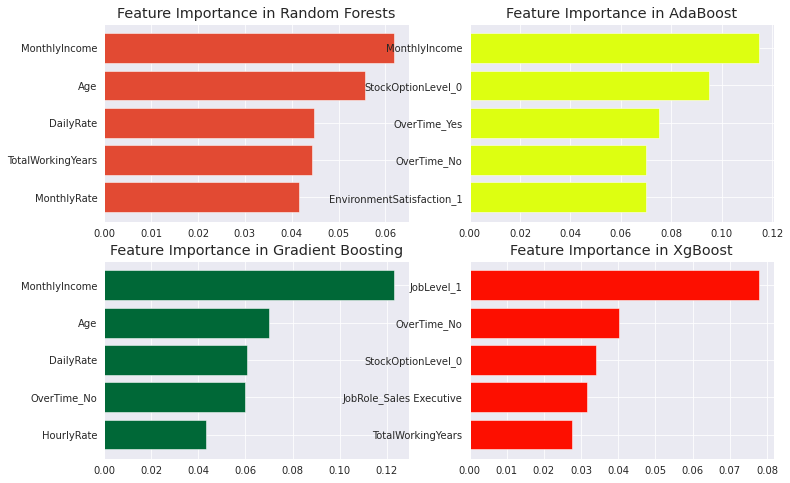

In [134]:
f,ax=plt.subplots(2,2,figsize=(12,8))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
out1 = pd.Series(model.feature_importances_,X.columns).nlargest(5)
out1.sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
out2 = pd.Series(model.feature_importances_,X.columns).nlargest(5)
out2.sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
out3 = pd.Series(model.feature_importances_,X.columns).nlargest(5)
out3.sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=300,learning_rate=0.05)
model.fit(X,Y)
out4 = pd.Series(model.feature_importances_,X.columns).nlargest(5)
out4.sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

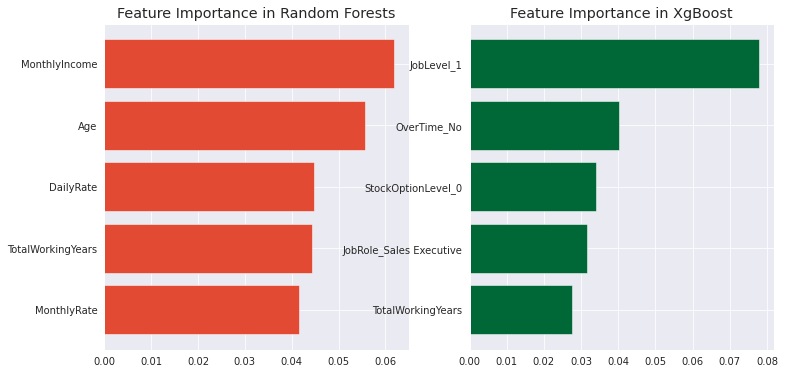

In [162]:
f,ax=plt.subplots(1,2,figsize=(12,6))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
out1 = pd.Series(model.feature_importances_,X.columns).nlargest(5)
out1.sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0])
ax[0].set_title('Feature Importance in Random Forests')


model=xg.XGBClassifier(n_estimators=300,learning_rate=0.05)
model.fit(X,Y)
out4 = pd.Series(model.feature_importances_,X.columns).nlargest(5)
out4.sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1],cmap='RdYlGn_r')
ax[1].set_title('Feature Importance in XgBoost')
plt.show()

In [131]:
final = pd.Series()
for i in [out1, out2, out3, out4]:
  final = final.add(i, fill_value=0)
final.sort_values(ascending=False)

MonthlyIncome                0.300083
OverTime_No                  0.170132
StockOptionLevel_0           0.129081
Age                          0.125638
DailyRate                    0.105400
JobLevel_1                   0.077997
OverTime_Yes                 0.075000
TotalWorkingYears            0.071892
EnvironmentSatisfaction_1    0.070000
HourlyRate                   0.043363
MonthlyRate                  0.041524
JobRole_Sales Executive      0.031509
dtype: float64

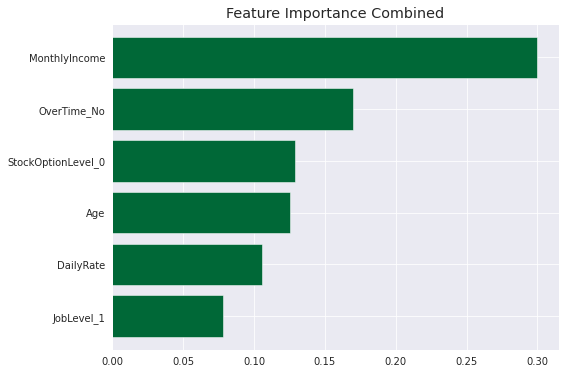

In [163]:
plt.subplots(figsize=(8,6))
final.nlargest(6).sort_values(ascending=True).plot.barh(width=0.8,cmap='RdYlGn_r',
                                                         title='Feature Importance Combined')